<a href="https://colab.research.google.com/github/Asadsammar/PCVK_TI3I/blob/main/Week5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gamma Correction on images
----------------------------------
Enter Gamma Number: 3


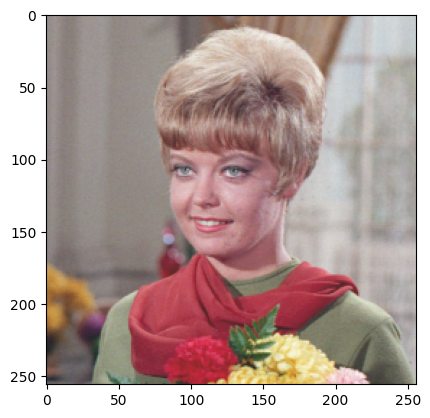

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print('Gamma Correction on images')
print('----------------------------------')

try:
  gamma = float(input('Enter Gamma Number: '))
except ValueError:
  print('Error, not a number')

# Gamma correction code

img = cv2.imread('/content/drive/MyDrive/PVCK_images/female.tiff')
gamma_corrected = np.array(255*(img / 255) ** (1 / gamma), dtype = 'uint8')

# Display gamma corrected image
plt.imshow(gamma_corrected[:,:,::-1])
plt.show()

Enter bit depth (1-8): 7


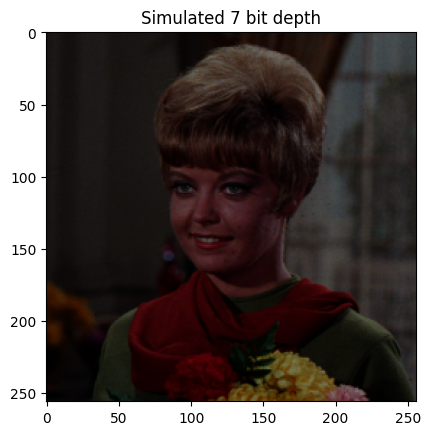

In [2]:
# Get bit depth from user
bit_depth = int(input("Enter bit depth (1-8): "))

# Read image
img = cv2.imread('/content/drive/MyDrive/PVCK_images/female.tiff')

# Quantize image to bit depth
max_val = 2**bit_depth - 1
img_quantized = np.floor((img / 255) * max_val).astype(np.uint8)

# Display quantized image
plt.imshow(img_quantized[:,:,::-1])
plt.title('Simulated ' + str(bit_depth) + ' bit depth')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

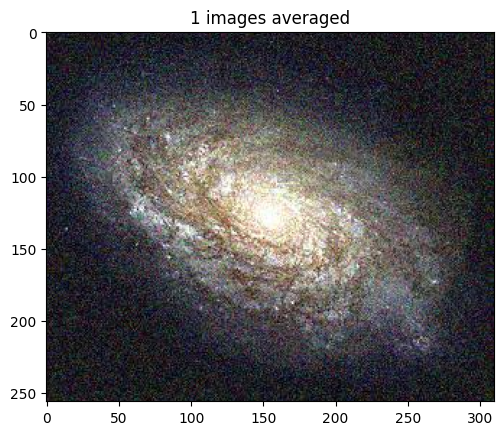

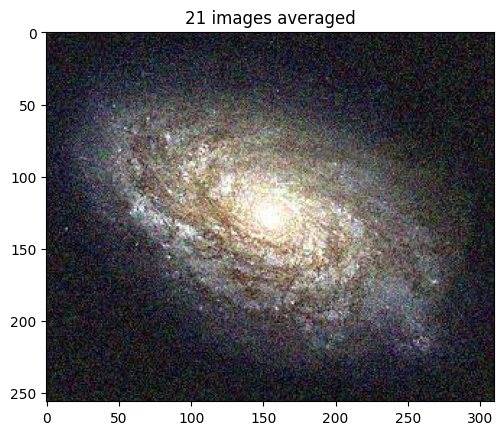

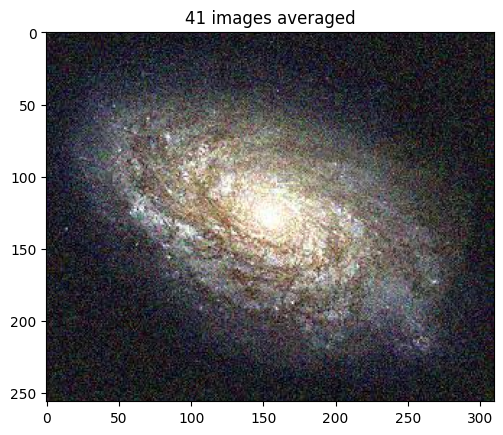

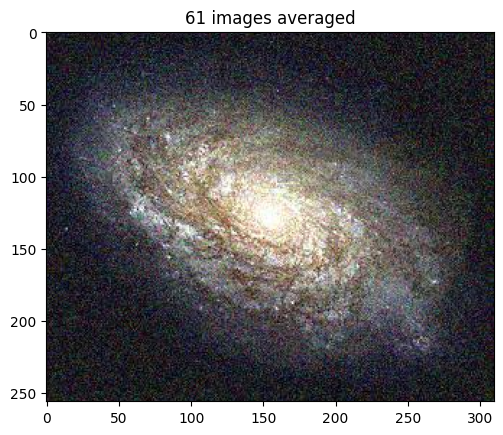

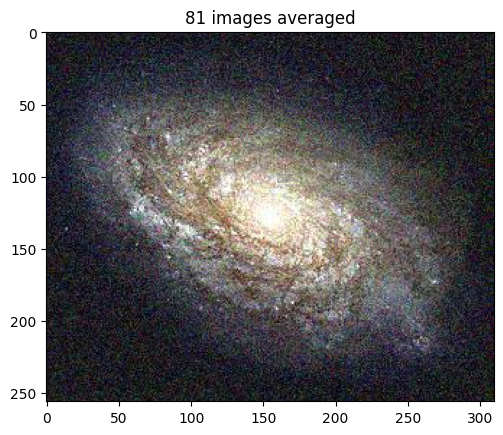

In [4]:
import glob
# Load noisy images
img_list = []
for img in glob.glob('/content/drive/MyDrive/PVCK_images/Images/noises/1.jpg'):
  n = cv2.imread(img)
  img_list.append(n)

# Average images
avg_imgs = []
for i in range(0, 100, 20):
  avg = np.mean(img_list[:i+1], axis=0).astype(np.uint8)
  avg_imgs.append(avg)

# Display averaged images
for i, avg_img in enumerate(avg_imgs):
  plt.imshow(avg_img[:,:,::-1])
  plt.title(str(i*20+1) + ' images averaged')
  plt.show()

# Calculate PSNR
# ...

cv2.waitKey(0)
cv2.destroyAllWindows()

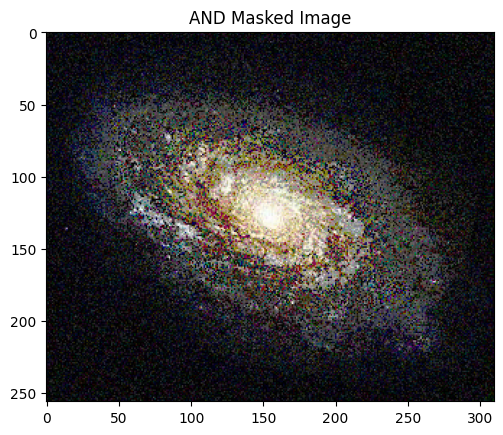

In [8]:
# Load images
img1 = cv2.imread('/content/drive/MyDrive/PVCK_images/Images/noises/1.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('/content/drive/MyDrive/PVCK_images/Images/noises/12.jpg', cv2.IMREAD_COLOR)

if img1 is None or img2 is None:
  print('Error loading images')
else:
  # Image masking
  masked = cv2.bitwise_and(img1, img2)

  plt.imshow(masked[:,:,::-1])
  plt.title('AND Masked Image')
  plt.show()

  cv2.waitKey(0)
  cv2.destroyAllWindows()

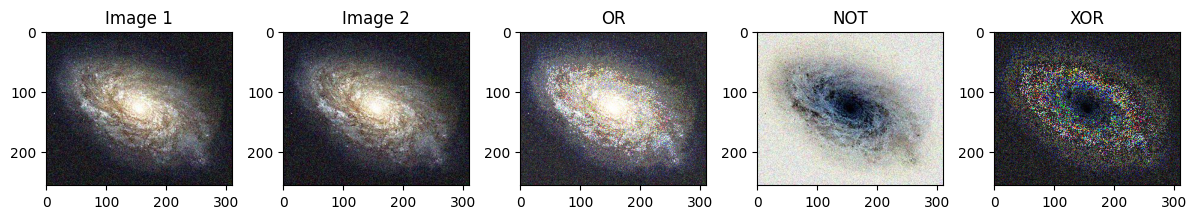

In [9]:
# Load images
img1 = cv2.imread('/content/drive/MyDrive/PVCK_images/Images/noises/1.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('/content/drive/MyDrive/PVCK_images/Images/noises/12.jpg', cv2.IMREAD_COLOR)

if img1 is None or img2 is None:
  print('Error loading images')
else:

  # Logical operations
  masked_or = cv2.bitwise_or(img1, img2)
  masked_not = cv2.bitwise_not(img1)
  masked_nand = cv2.bitwise_not(cv2.bitwise_and(img1, img2))
  masked_xor = cv2.bitwise_xor(img1, img2)

  plt.figure(figsize=(12,6))

  plt.subplot(151); plt.imshow(img1[:,:,::-1]); plt.title('Image 1')
  plt.subplot(152); plt.imshow(img2[:,:,::-1]); plt.title('Image 2')
  plt.subplot(153); plt.imshow(masked_or[:,:,::-1]); plt.title('OR')
  plt.subplot(154); plt.imshow(masked_not[:,:,::-1]); plt.title('NOT')
  plt.subplot(155); plt.imshow(masked_xor[:,:,::-1]); plt.title('XOR')

  plt.tight_layout()
  plt.show()

  cv2.waitKey(0)
  cv2.destroyAllWindows()